# 自编码器 —— Mnist数据集
1. 基于DNN的自编码器
2. 基于CNN的自编码器

Mnist数据集：
数据来源于Kaggle竞赛提供的数据：Digit Recognizer （https://www.kaggle.com/c/digit-recognizer/data）
训练集包含42,000个样本，测试集包含28,000个样本。
每个样本为28*28的灰度图像，像素值在[0,255]
数据排列形式：
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 

## 导入工具包

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn as nn

import pandas as pd
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/qing/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


## 定义超参数

In [2]:
#训练次数
EPOCH = 100

#每批次的样本数目
BATCH_SIZE = 256

#学习率
LR = 0.001

#可视化重构图像数目
N_TEST_IMG = 5

## PyTorch自带MINIST数据集
## 1. 下载数据
## 2.  装载数据

In [3]:
#root：数据集存放的路径，transform：导入数据集时需要进行何种变换操作，
#train=True：导入的是训练集合，否则为测试集合。

#Tensor格式转换
#transform = transforms.Compose([transforms.ToTensor(),
#                               transforms.Normalize(mean=[0.5],std=[0.5])])

#train_data = datasets.MNIST(root = "./data/",
#                            transform=transform,
#                            train = True,
#                            download = True)

#print(train_data.train_data.size())     # (60000, 28, 28)

#batch_size:每批装载64个图片，shuffle: 随机乱序
#data_loader_train = torch.utils.data.DataLoader(dataset = train_data,
#                                                batch_size = BATCH_SIZE,
#                                                shuffle = True)

## 读取数据
这里我们用于Kaggle竞赛提供的数据：Digit Recognizer （https://www.kaggle.com/c/digit-recognizer/data）
分别存在两个在csv文件

In [4]:
#读取训练数据,训练集中有42000个样本
train = pd.read_csv('./data/MNIST_train.csv')

n_train = len(train)
n_pixels = len(train.columns) - 1
n_class = len(set(train['label']))

print('Number of training samples: {0}'.format(n_train))
print('Number of training pixels: {0}'.format(n_pixels))
print('Number of classes: {0}'.format(n_class))

Number of training samples: 42000
Number of training pixels: 784
Number of classes: 10


In [5]:
#分离特征和标签
y_train = train.label.values
X_train = train.drop("label",axis=1).values

#2D图像，像素值[0,255]  --> [0,1]  --> [-1, 1](神经网络的输入在-1到1之间更容易收敛)
X_train = X_train/255.0
X_train = (X_train)*2 - 1
X_train = X_train.reshape(-1, 1, 28, 28)  #(samples, channels, height, width))


# 训练数据的特征和标签：numpy
tX_train = torch.from_numpy(X_train).type(torch.float)
t_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# 训练数据的特征：Tensor
train = torch.utils.data.TensorDataset(tX_train,t_y_train)
#test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# 数据装载器
data_loader_train = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = True)
#test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

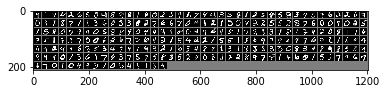

In [6]:
#显示第一批100个图像，每个数字占 （28+padding）*（28+padding）个像素
images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images, nrow=40)

img = img.numpy().transpose(1,2,0)
img = img + 1
img = img*0.5
#plt.title(labels.numpy())
plt.imshow(img)

## 定义网络结构

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #全连接层
            nn.ReLU(True),         #激活层
            
            nn.Linear(128, 64),    #全连接层
            nn.ReLU(True),         #激活层
            
            nn.Linear(64, 32),     #全连接层
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            
            nn.Linear(64, 128),
            nn.ReLU(True),
            
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # 结果在[0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

## 模型训练

In [8]:
#生成网络实例
autoencoder = AutoEncoder()


In [9]:
#定义损失函数
loss_func = nn.MSELoss()

#优化算法
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay=1e-5)


#如果有已经训练好的模型，装载之前训练好的模型的参数
#autoencoder.load_state_dict(torch.load('ae_DNN_parameter.pkl'))

('Epoch: ', 0, '| train loss: 0.9181')
('Epoch: ', 1, '| train loss: 0.9246')
('Epoch: ', 2, '| train loss: 0.9215')
('Epoch: ', 3, '| train loss: 0.9174')
('Epoch: ', 4, '| train loss: 0.9199')
('Epoch: ', 5, '| train loss: 0.9241')
('Epoch: ', 6, '| train loss: 0.9258')
('Epoch: ', 7, '| train loss: 0.9275')
('Epoch: ', 8, '| train loss: 0.9253')
('Epoch: ', 9, '| train loss: 0.9109')
('Epoch: ', 10, '| train loss: 0.9233')
('Epoch: ', 11, '| train loss: 0.9210')
('Epoch: ', 12, '| train loss: 0.9250')
('Epoch: ', 13, '| train loss: 0.9308')
('Epoch: ', 14, '| train loss: 0.9236')
('Epoch: ', 15, '| train loss: 0.9290')
('Epoch: ', 16, '| train loss: 0.9233')
('Epoch: ', 17, '| train loss: 0.9070')
('Epoch: ', 18, '| train loss: 0.9022')
('Epoch: ', 19, '| train loss: 0.9220')
('Epoch: ', 20, '| train loss: 0.9076')
('Epoch: ', 21, '| train loss: 0.9047')
('Epoch: ', 22, '| train loss: 0.8818')
('Epoch: ', 23, '| train loss: 0.9005')
('Epoch: ', 24, '| train loss: 0.8870')
('Epoch: '

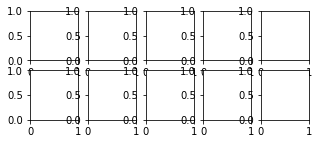

In [10]:
# 初始化可视化图像
#f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
#plt.ion()   # continuously plot

#可视化重构图像
#view_data = tX_train[: N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)
#for i in range(N_TEST_IMG):
    #a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    #a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(data_loader_train):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = b_x   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        
    print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())


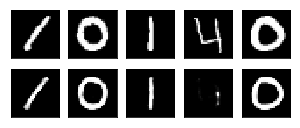

In [18]:
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

#可视化重构图像
view_data = tX_train[: N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

_, decoded_data = autoencoder(view_data)
for i in range(N_TEST_IMG):
    a[1][i].clear()
    a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[1][i].set_xticks(()); a[1][i].set_yticks(())
plt.draw(); plt.pause(0.05)
            
plt.ioff()
plt.show()

## 保存模型参数

In [ ]:
torch.save(autoencoder.state_dict(), "ae_DNN_parameter.pkl")

## 可视化压缩数据

In [19]:
# Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        plt.title(title)

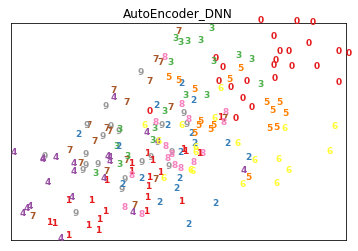

In [ ]:
#显示前200个数字
view_data = (tX_train[:200]).view(-1, 28*28)

#编码
encoded_data, _ = autoencoder(view_data)


#真实标签
lables = t_y_train[:200].numpy()

plot_embedding(encoded_data.data[:, 0:2].numpy(), lables, "AutoEncoder_DNN")

## 卷积自编码器

In [7]:
###定义网络结构
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()      
        
        ## encoder layers ##
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3,  padding=1) , #卷积层，depth from 1 --> 16, 3x3 kernels, img_size: 28*28 -> 28*28
            nn.ReLU(),  #激活层
            nn.MaxPool2d(2, 2),   #池化层, -->16*14*14
            
            nn.Conv2d(16, 4, 3, padding=1),  #卷积层，depth from 16 --> 4, 3x3 kernels, img_size: 14*14 -> 14*14
            nn.ReLU(),
            nn.MaxPool2d(2, 2),   #池化层, -->4*7*7
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2, stride=2),  #转置卷积，a kernel of 2 and a stride of 2 will increase the spatial dims by 2
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2, stride=2),
            nn.Sigmoid(),       # 结果在[0, 1]
        )
   

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [8]:
##训练网络
# initialize the NN
autoencoder_cnn = ConvAutoencoder()
print(autoencoder_cnn)

#定义损失函数
loss_func = nn.MSELoss()

#优化算法
optimizer = torch.optim.Adam(autoencoder_cnn.parameters(), lr=LR)


#如果有已经训练好的模型，装载之前训练好的模型的参数
#autoencoder_cnn.load_state_dict(torch.load('ae_CNN_parameter.pkl'))

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


In [17]:
for epoch in range(EPOCH):
    for step, (b_x, b_label) in enumerate(data_loader_train):
        #b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = b_x   # batch y
   
        encoded, decoded = autoencoder_cnn(b_x)
        
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
            
            #可视化重构结果#
            #_, decoded_data = autoencoder_cnn(view_data)
            #for i in range(N_TEST_IMG):
            #    a[1][i].clear()
            #    a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
            #    a[1][i].set_xticks(()); a[1][i].set_yticks(())
            #plt.draw(); plt.pause(0.05)
            
#plt.ioff()
#plt.show()

('Epoch: ', 0, '| train loss: 1.8895')
('Epoch: ', 0, '| train loss: 0.9367')
('Epoch: ', 1, '| train loss: 0.9262')
('Epoch: ', 1, '| train loss: 0.9119')
('Epoch: ', 2, '| train loss: 0.9138')
('Epoch: ', 2, '| train loss: 0.9092')
('Epoch: ', 3, '| train loss: 0.9078')
('Epoch: ', 3, '| train loss: 0.9010')
('Epoch: ', 4, '| train loss: 0.9043')
('Epoch: ', 4, '| train loss: 0.8992')
('Epoch: ', 5, '| train loss: 0.8974')
('Epoch: ', 5, '| train loss: 0.8901')
('Epoch: ', 6, '| train loss: 0.8895')
('Epoch: ', 6, '| train loss: 0.8898')
('Epoch: ', 7, '| train loss: 0.8896')
('Epoch: ', 7, '| train loss: 0.8877')
('Epoch: ', 8, '| train loss: 0.8820')
('Epoch: ', 8, '| train loss: 0.8848')
('Epoch: ', 9, '| train loss: 0.8873')
('Epoch: ', 9, '| train loss: 0.8817')
('Epoch: ', 10, '| train loss: 0.8801')
('Epoch: ', 10, '| train loss: 0.8826')
('Epoch: ', 11, '| train loss: 0.8879')
('Epoch: ', 11, '| train loss: 0.8807')
('Epoch: ', 12, '| train loss: 0.8839')
('Epoch: ', 12, '| t

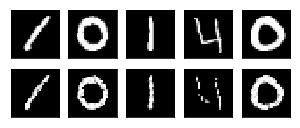

In [18]:
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

#可视化重构图像
view_data = tX_train[: N_TEST_IMG].type(torch.FloatTensor)
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()); a[0][i].set_yticks(())

_, decoded_data = autoencoder_cnn(view_data)
for i in range(N_TEST_IMG):
    a[1][i].clear()
    a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[1][i].set_xticks(()); a[1][i].set_yticks(())
plt.draw(); plt.pause(0.05)
            
plt.ioff()
plt.show()